# Building a Dumb Coin Identifier with OpenCV

Playing around with the library

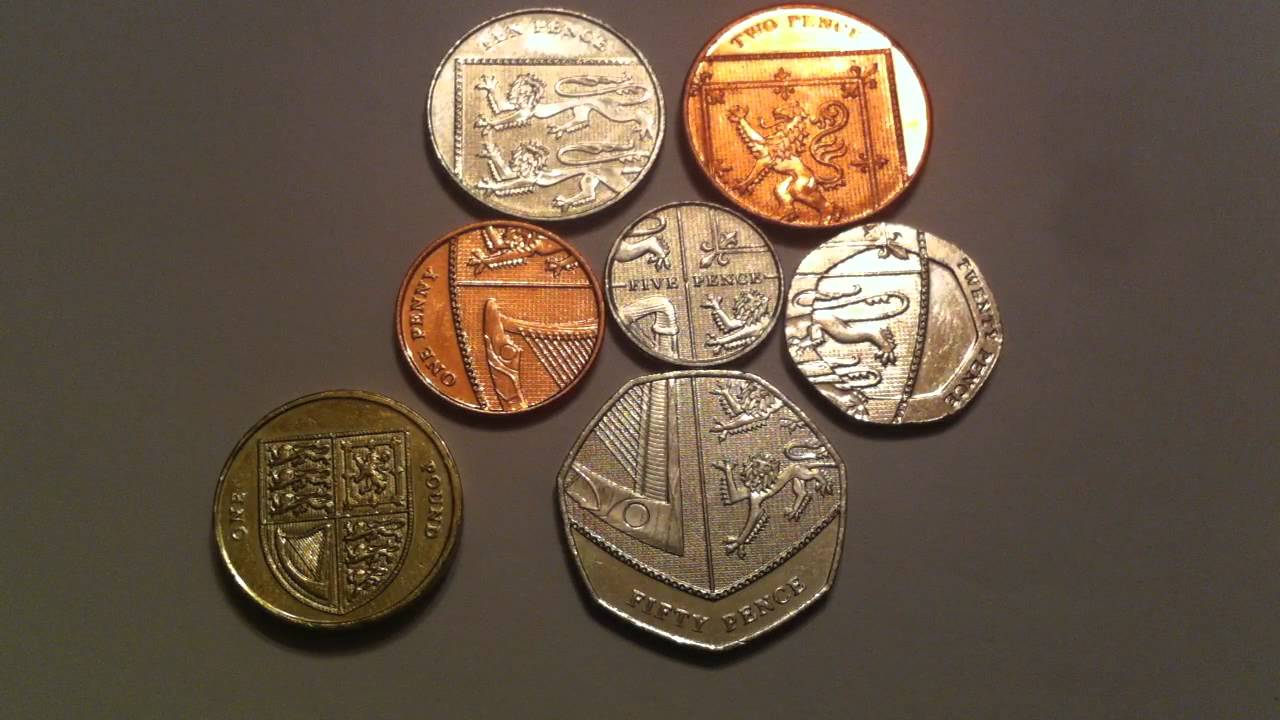

In [215]:
import cv2
import numpy as np
from IPython.core.display import Image, display

# print image of interest
display(Image(filename = 'coins.jpg', width=500, unconfined=True))

In [216]:
# read in image
img = cv2.imread("coins.jpg", 1)

# convert to greyscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur the image
img_gray = cv2.GaussianBlur(img_gray, (11,11), 0)

# use Hough Circle Transform to draw circles
circles = cv2.HoughCircles(img_gray,cv2.HOUGH_GRADIENT,1,120,
                            param1=50,param2=30,minRadius=69,maxRadius=120)

# output image of coins with circles overlayed on top
count = 1
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_gray,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_gray,(i[0],i[1]),2,(0,0,255),3)
    #cv2.putText(img_gray, str(count), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2)
    count += 1
    
cv2.imshow('detected circles',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [217]:
# use average brightness of each coin to try to classify the coins
def brightness(img_gray, circles, size):
    avg_brightness = []
    for c in circles[0,:]:
        b = np.mean(img_gray[c[1]-size:c[1]+size,c[0]-size:c[0]+size])
        avg_brightness.append(b)
    return avg_brightness

brightness_values = brightness(img_gray, circles, 20)
print(brightness_values)

[68.794375, 122.15125, 193.89875, 150.559375, 112.36875, 158.0575, 187.990625]


In [218]:
# use list of radii to try to classify the coins
def get_radii(circles):
    radii = []
    for c in circles[0,:]:
        radii.append(c[2])
    return radii

radii = get_radii(circles)
print(radii)

[114, 104, 116, 106, 115, 101, 105]


In [219]:
# calculate coins' values based on brightness and radii
values = []

for a, b in zip(brightness_values, radii):
    if a > 150 and a < 155 and b > 100:
        values.append(200)
    elif a < 70 and b > 100:
        values.append(100)
    elif a > 110 and a < 120 and b > 100:
        values.append(50)
    elif a > 170 and b > 100 and b < 110:
        values.append(20)
    elif a > 150 and b > 110:
        values.append(10)
    elif a > 150 and b <= 109:
        values.append(5)
    elif a < 150 and b > 110:
        values.append(2)
    elif a < 150 and b < 110:
        values.append(1)  

print(values)
# output final result
count_2 = 0
for i in circles[0,:]:
    
    cv2.putText(img, str(values[count_2]) + 'p',(i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)
    count_2 += 1
cv2.putText(img, 'ESTIMATED TOTAL VALUE: ' + str(sum(values)) + 'p', (200,100), cv2.FONT_HERSHEY_SIMPLEX, 1.3, 255)
    
cv2.imshow('Detected Coins',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[100, 1, 10, 200, 50, 5, 20]


Pretty neat library, can probably train a deep learning network to automate the coin classification criteria to make the identifier smart.